<a href="https://colab.research.google.com/github/square-1111/Miscellaneous/blob/master/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting started with PyTorch

## Image Classification on CIFAR10

### GPU configuration

In [0]:
!nvidia-smi

Sun Jan  6 09:43:12 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 396.44                 Driver Version: 396.44                    |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P8    31W / 149W |      0MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

### Setting up Packages 
$pytorch == 0.4.1$  S
$cuda== 9.2$

In [0]:
!wget https://developer.nvidia.com/compute/cuda/9.2/Prod2/local_installers/cuda-repo-ubuntu1604-9-2-local_9.2.148-1_amd64 

--2019-01-06 09:43:26--  https://developer.nvidia.com/compute/cuda/9.2/Prod2/local_installers/cuda-repo-ubuntu1604-9-2-local_9.2.148-1_amd64
Resolving developer.nvidia.com (developer.nvidia.com)... 192.229.189.146
Connecting to developer.nvidia.com (developer.nvidia.com)|192.229.189.146|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://developer.download.nvidia.com/compute/cuda/9.2/secure/Prod2/local_installers/cuda-repo-ubuntu1604-9-2-local_9.2.148-1_amd64.deb?Q1b-QMzPo3r_USQpSxMttIqKOYs7QSd8FW4xKfkHR7lwTZ7OkOvd_Bt3Io6Hv0QJdT6tA_GvoRYruwwK3bp1j4uNdGTYSfl85bqqL_Q9L0DxmVoeMw0K9-2I-KFjwIw9-yGi4E_B32TYH6lLd4IYail-w3L_BQY9BMRtvJmA7j4Pp8K1PUuh4u0IBbAmlqefaDwVZ9iatx1zLTlCgD0KXQ [following]
--2019-01-06 09:43:27--  https://developer.download.nvidia.com/compute/cuda/9.2/secure/Prod2/local_installers/cuda-repo-ubuntu1604-9-2-local_9.2.148-1_amd64.deb?Q1b-QMzPo3r_USQpSxMttIqKOYs7QSd8FW4xKfkHR7lwTZ7OkOvd_Bt3Io6Hv0QJdT6tA_GvoRYruwwK3bp1j4uNdGTYSfl85bqqL_Q9L0Dxm

In [0]:
!dpkg --install cuda-repo-ubuntu1604-9-2-local_9.2.148-1_amd64

Selecting previously unselected package cuda-repo-ubuntu1604-9-2-local.
(Reading database ... 110845 files and directories currently installed.)
Preparing to unpack cuda-repo-ubuntu1604-9-2-local_9.2.148-1_amd64 ...
Unpacking cuda-repo-ubuntu1604-9-2-local (9.2.148-1) ...
Setting up cuda-repo-ubuntu1604-9-2-local (9.2.148-1) ...


In [0]:
!apt-key add /var/cuda-repo-9-2-local/7fa2af80.pub

OK


In [0]:
!apt-get update

Get:1 file:/var/cuda-repo-9-2-local  InRelease
Ign:1 file:/var/cuda-repo-9-2-local  InRelease
Get:2 file:/var/cuda-repo-9-2-local  Release [574 B]
Get:2 file:/var/cuda-repo-9-2-local  Release [574 B]
Get:3 file:/var/cuda-repo-9-2-local  Release.gpg [819 B]
Get:3 file:/var/cuda-repo-9-2-local  Release.gpg [819 B]
Get:4 file:/var/cuda-repo-9-2-local  Packages [18.7 kB]
Ign:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1710/x86_64  InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1604/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1710/x86_64  Release
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1604/x86_64  Release
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:10 http://security.ubuntu.com/ubuntu bionic-security InRelease [83.2 kB]
Get:12 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:13 http://ppa.launchpad.net/gr

In [0]:
!apt-get install cuda

Reading package lists... Done
Building dependency tree       
Reading state information... Done
cuda is already the newest version (9.2.148-1).
0 upgraded, 0 newly installed, 0 to remove and 8 not upgraded.


In [0]:
!cat /usr/local/cuda/version.txt

CUDA Version 9.2.148


In [0]:
!pip install https://download.pytorch.org/whl/cu91/torch-0.4.0-cp36-cp36m-linux_x86_64.whl

    100% |████████████████████████████████| 538.9MB 27kB/s 
tcmalloc: large alloc 1073750016 bytes == 0x5d238000 @  0x7fcb4cdf72a4 0x591a07 0x5b5d56 0x502e9a 0x506859 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x504c28 0x502540 0x502f3d 0x507641


In [0]:
!pip install torchvision

    100% |████████████████████████████████| 61kB 2.3MB/s 
    100% |████████████████████████████████| 2.0MB 12.4MB/s 
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0


### Importing packages

In [0]:
from __future__ import print_function
import torch
import numpy as np

print("torch version {}".format(torch.__version__))
print("cuda version {}".format(torch.version.cuda))
print("cudNN version {}".format(torch.backends.cudnn.version()))

torch version 0.4.0
cuda version 9.1.85
cudNN version 7102


## Basics 

### Zero matrix

In [0]:
x = torch.zeros(4, 3)
x

tensor([[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]])

### Creating tensor based on existing tensor

In [0]:
x = x.new_ones(4,3)
x

tensor([[ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.]])

### Reshaping of tensor

In [0]:
y = x.view(-1, 6 )
y

tensor([[ 1.,  1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.,  1.]])

### Check if $cuda$ is available

In [0]:
cud_avail = torch.cuda.is_available()

### Moving tensors onto any device
Here we are considering $cuda \ tensors$

In [0]:
if cud_avail :
  device = torch.device('cuda')
  y = torch.ones_like(x, device=device)
  x = x.to(device)
  z = x + y
  print(z)
  print(z.to("cpu"))

tensor([[ 2.,  2.,  2.],
        [ 2.,  2.,  2.],
        [ 2.,  2.,  2.],
        [ 2.,  2.,  2.]], device='cuda:0')
tensor([[ 2.,  2.,  2.],
        [ 2.,  2.,  2.],
        [ 2.,  2.,  2.],
        [ 2.,  2.,  2.]])


### Autograd : Automatic Differentiation

In [0]:
# turn requires_grad = True to track computation with
x = torch.ones(2,3, requires_grad = True)
x

tensor([[ 1.,  1.,  1.],
        [ 1.,  1.,  1.]])

In [0]:
y = x * 2
y.grad_fn

In [0]:
z = y * y * 3
out = z.mean()
print(z)
out

tensor([[ 12.,  12.,  12.],
        [ 12.,  12.,  12.],
        [ 12.,  12.,  12.],
        [ 12.,  12.,  12.]], device='cuda:0')


tensor(12., device='cuda:0')

### Backprop

In [0]:
out.backward()

RuntimeError: ignored

In [56]:
# l = x
# while l.data.norm() < 5:
#   l = l*2
 
# l = l.view(-1)
# l.size()

torch.Size([6])

In [0]:
# y = [i*0.1 for i in range(l.size()[0])]
# y = np.array(y)
# y = torch.from_numpy(y)
# y = y.float()
# l.backward(y)

In [0]:
# x.grad

### Neural Networks 

In [0]:
import torch.nn as nn
import torch.nn.functional as F

In [58]:
class NeuNet(nn.Module):
  def __init__(self):
    super(NeuNet, self).__init__()
    
    #num. of input channel = 1, num. of output channel = 6, filter size = 5*5
    self.conv1 = nn.Conv2d(1, 6, 5)
    self.conv2 = nn.Conv2d(6, 16, 5)
    
    # y = Wx + b
    self.fc1 = nn.Linear(400, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)
    
  def forward(self, x):
    # Max Pooling over a (2,2) window
    x = F.max_pool2d(F.relu(self.conv1(x)), (2,2))
    x = F.max_pool2d(F.relu(self.conv2(x)), 2)
    x = x.view(-1, self.num_flat_features(x))
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x
  
  def num_flat_features(self, x):
    size = x.size()[1:] #all dimensions except batch dimension
    num_feature = 1
    for s in size:
      num_feature *= s
    return num_feature

net = NeuNet()
net

NeuNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

### Learnable Parametes

In [59]:
params = list(net.parameters())
print(len(params))
for param in params:
  print(param.size())

print(net.parameters())

10
torch.Size([6, 1, 5, 5])
torch.Size([6])
torch.Size([16, 6, 5, 5])
torch.Size([16])
torch.Size([120, 400])
torch.Size([120])
torch.Size([84, 120])
torch.Size([84])
torch.Size([10, 84])
torch.Size([10])
<generator object Module.parameters at 0x7f456b9e9af0>


In [60]:
inpt = torch.randn(1,1,32,32)
out = net(inpt)
out.shape

torch.Size([1, 10])

In [0]:
net.zero_grad()
# out.backward(torch.randn(1,10), retain_graph = True)

### Loss Function

In [62]:
import math
criterion = nn.MSELoss()
target = torch.randn(10)
print(target)
print(out)
target = target.view(1,-1)

loss = criterion(out, target)


tensor([ 0.1141, -0.2980, -0.7303, -0.3544, -1.7434, -1.1736, -0.7671,
         0.3979, -0.3042,  0.3103])
tensor([[ 0.1187, -0.1040,  0.0003,  0.0327, -0.1423,  0.0425, -0.0928,
         -0.1335, -0.1657, -0.1438]])


In [63]:
loss.grad_fn.next_functions[0][0].next_functions[0][0]

### Backprop

In [64]:
net.zero_grad() # zeros the gradient buffer of all parameters

print('conv1.bias.grad before backwad \n{}'.format(net.conv1.bias.grad))

# loss.backward(retain_graph = True)

print('conv1.bias.grad after backward \n{}'.format(net.conv1.bias.grad))

conv1.bias.grad before backwad 
None
conv1.bias.grad after backward 
None


### Update the weights

In [0]:
# learning_rate = 0.01
# for f in net.parameters():
#   f.data.sub_(f.grad.data*learning_rate)

### Optimizers

In [0]:
import torch.optim as optim

optimir = optim.SGD(net.parameters(), lr=0.01)

optimir.zero_grad()
output = net(inpt)
loss = criterion(output, target)
# loss.backward()
optimir.step()

## Classifier
Trained on CIFAR10

In [0]:
import torchvision
import torchvision.transforms as transforms

### Data Preprocessing


In [0]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified


### Draw Images

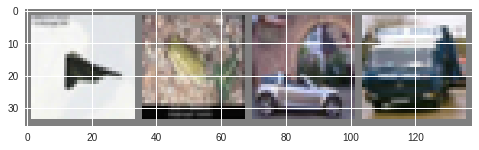

plane  frog   car truck


In [0]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
    
dataiter = iter(trainloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

### Convolutional Neural Network

In [0]:
class CNNet(nn.Module):
  def __init__(self):
    super(CNNet, self).__init__()
    
    #num. of input channel = 3, num. of output channel = 6, filter size = 5*5
    self.conv1 = nn.Conv2d(3, 6, 5)
    self.pool = nn.MaxPool2d(2,2)
    self.conv2 = nn.Conv2d(6, 16, 5)
    
    # y = Wx + b
    self.fc1 = nn.Linear(400, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)
    
  def forward(self, x):
    # Max Pooling over a (2,2) window
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = x.view(-1, 400)#self.num_flat_features_(x))
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x
  
  def num_flat_features_(self, x):
    size = x.size()[1:] #all dimensions except batch dimension
    num_feature = 1
    for s in size:
      num_feature *= s
    return num_feature

Cnet = CNNet()
Cnet

CNNet(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

### Loss function for classifier

In [0]:
import torch.optim as optim

criteron = nn.CrossEntropyLoss()
optimizer = optim.SGD(Cnet.parameters(), lr=0.001, momentum=0.9)

### Train the network

In [0]:
for epoch in range(5):
  
  running_loss = 0
#   inputs, labels = trainloader[0]
#   print(inputs)
  
  for i, data in enumerate(trainloader, 0):
    inputs, labels = data
    
    optimizer.zero_grad()
    
    output = Cnet(inputs)
    loss = criteron(output, labels)
    loss.backward()
    optimizer.step()
    
    running_loss += loss.item()
    if i % 2000 == 1999:
      print('{} ,{} loss: {}'.format(epoch + 1, i + 1, (running_loss/2000)))
      running_loss = 0.0
     
print('Training finished')
# type(trainloader)
# dataiter = iter(trainloader)
# images, labels = dataiter.next()
# images

1 ,2000 loss: 2.161281720995903
1 ,4000 loss: 1.8235802721083165
1 ,6000 loss: 1.6645877816081047
1 ,8000 loss: 1.571964512139559
1 ,10000 loss: 1.4952544699162245
1 ,12000 loss: 1.4548514646962285
2 ,2000 loss: 1.365952362857759
2 ,4000 loss: 1.3598143969997765
2 ,6000 loss: 1.337087389241904
2 ,8000 loss: 1.2968957989029586
2 ,10000 loss: 1.296057362217456
2 ,12000 loss: 1.253874224888161
3 ,2000 loss: 1.2360389004200696
3 ,4000 loss: 1.1721997843235732
3 ,6000 loss: 1.1639302002042533
3 ,8000 loss: 1.1742408308256418
3 ,10000 loss: 1.1583564420510084
3 ,12000 loss: 1.1533841426819562
4 ,2000 loss: 1.0586658039893955
4 ,4000 loss: 1.0816849069204182
4 ,6000 loss: 1.1029280933272094
4 ,8000 loss: 1.1044383986983448
4 ,10000 loss: 1.062440302701667
4 ,12000 loss: 1.0891358838183804
5 ,2000 loss: 0.9944255008688196
5 ,4000 loss: 1.0062822228111328
5 ,6000 loss: 1.0122561951149256
5 ,8000 loss: 1.0125840974226594
5 ,10000 loss: 1.028723164390307
5 ,12000 loss: 1.0347728527756408
Training

### Test

In [0]:
dataiter = iter(testloader)
images, labels = dataiter.next()
outputs = Cnet(images)


In [0]:
print("Target is")
for i in labels:
  print(classes[i])

Target is
cat
ship
ship
plane


In [0]:
print("Output is")
print(outputs)
_, predicted = torch.max(outputs, 1)

print(predicted)
for i in predicted:
  print(classes[i])

Output is
tensor([[-2.0184, -2.2613, -0.3859,  5.4963, -2.3939,  4.3051,  0.0779,
         -0.7782, -0.3558, -1.6690],
        [ 3.7112,  4.3056, -1.0419, -2.2965, -3.8230, -3.8022, -4.0386,
         -4.4063,  6.5356,  4.4780],
        [ 2.2332,  2.8438,  0.0359, -1.3552, -3.0517, -1.9502, -2.4921,
         -1.7389,  2.1501,  5.0833],
        [ 5.0674, -1.2001,  2.0320, -1.7515,  0.4641, -3.5577, -3.2423,
         -2.8130,  4.2782, -0.8455]])
tensor([ 3,  8,  9,  0])
cat
ship
truck
plane


In [0]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = Cnet(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 62 %
